In [25]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

conn = psycopg2.connect(
    host='localhost',
    database='EmployeeSQL',
    user='postgres',
    password='Peterjuly19')

cur = conn.cursor()

cur.execute("select * from salaries")

rows= cur.fetchall()
salaries = []
for r in rows:
    salaries.append(r)
    
cur.execute("select * from titles")

rows= cur.fetchall()
titles = []
for r in rows:
    titles.append(r)
    
cur.close()
conn.close()

salaries=pd.DataFrame(salaries)
salaries=salaries[[0, 1]]
salaries=salaries.rename(columns ={0: 'Employee No.', 1:'Salary'})

titles=pd.DataFrame(titles)
titles=titles[[0, 1]]
titles=titles.rename(columns ={0: 'Employee No.', 1:'Title'})

sal_tit_df=pd.merge(salaries, titles, on = 'Employee No.')
sal_tit_df.head()

,Employee No.,Salary,Title
0,10001,60117,Senior Engineer
1,10002,65828,Staff
2,10003,40006,Senior Engineer
3,10004,40054,Engineer
4,10004,40054,Senior Engineer


In [27]:
sal_tit_df['Employee No.'].count()

443308

In [28]:
sal_tit_df['Salary'].describe()

count    443308.000000
mean      53023.809615
std       14337.904140
min       40000.000000
25%       40000.000000
50%       48746.000000
75%       61843.000000
max      129492.000000
Name: Salary, dtype: float64

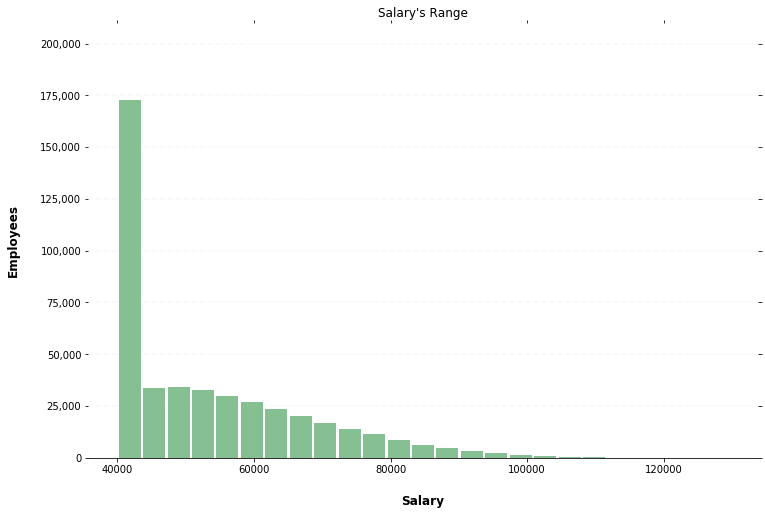

In [26]:
ax = sal_tit_df.hist(column='Salary', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Salary's Range")

    # Set x-axis label
    x.set_xlabel("Salary", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Employees", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [36]:
avg_sal_by_tit=sal_tit_df[['Salary','Title']]

avg_sal_by_tit=avg_sal_by_tit.groupby(['Title']).mean()
avg_sal_by_tit=pd.DataFrame(avg_sal_by_tit)
avg_sal_by_tit=avg_sal_by_tit.reset_index()
avg_sal_by_tit=avg_sal_by_tit.round(2)
avg_sal_by_tit

,Title,Salary
0,Assistant Engineer,48493.20
1,Engineer,48539.78
2,Manager,51531.04
3,Senior Engineer,48506.75
4,Senior Staff,58503.29
5,Staff,58465.27
6,Technique Leader,48580.51


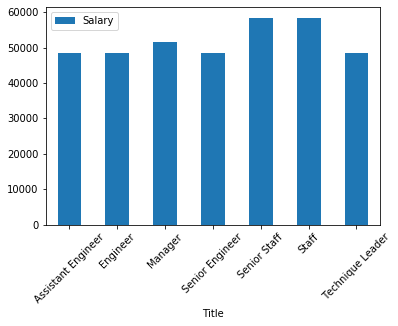

In [50]:
ax = avg_sal_by_tit.plot.bar(x='Title', y='Salary', rot=45)
ax